In [72]:
source("require_packages.R")
source("setup.R")
library(forcats)

In [2]:
ls()
glimpse(dataset)

[1] "dataset"          "require_packages"

Observations: 105,450
Variables: 26
$ id                       <int> 112119128, 112436920, 112390231, 112156817...
$ loan_amnt                <int> 25000, 26000, 20000, 10000, 15000, 2000, 5...
$ term                     <fctr> 60 months, 36 months, 36 months, 36 month...
$ int_rate                 <dbl> 0.1505, 0.0993, 0.0944, 0.0721, 0.0797, 0....
$ installment              <dbl> 595.41, 838.10, 640.10, 309.74, 469.84, 61...
$ grade                    <fctr> C, B, B, A, A, A, C, D, A, A, A, A, F, B,...
$ sub_grade                <fctr> C, B, B, A, A, A, C, D, A, A, A, A, F, B,...
$ emp_title                <chr> "Supervisor", "Dealer", "Executive Assista...
$ emp_length               <fctr> 10+ years, 7 years, < 1 year, 7 years, 3 ...
$ home_ownership           <fctr> RENT, OWN, RENT, OWN, MORTGAGE, RENT, REN...
$ annual_inc               <dbl> 60000.0, 57900.0, 70000.0, 145000.0, 10200...
$ issue_d                  <date> 2017-06-17, 2017-06-17, 2017-06-17, 2017-...
$ loan_status   

In [93]:
options(repr.plot.width=10, repr.plot.height=6.18)
#col_classes <- sapply(dataset,class);col_classes
#col_names <- names(col_classes);col_names
#for(i in 1 : length(col_classes)){
#    if(col_classes[i] %in% c("numeric","integer")){
#        print(dataset %>%
#            select_(col_names[i]) %>%
#            ggplot(mapping = aes_string(x = col_names[i])) +
#            geom_histogram() +
#            labs(title = col_names[i]))
#    } else if(col_classes[i] == "factor") {
#        print(dataset %>%
#            select_(col_names[i]) %>%
#            ggplot(mapping = aes_string(x = col_names[i])) +
#            geom_bar() +
#            labs(title = col_names[i]) +
#            coord_flip())
#    } else {
#        print("character type not applicable")
#    }
#}

### all types instead of current:

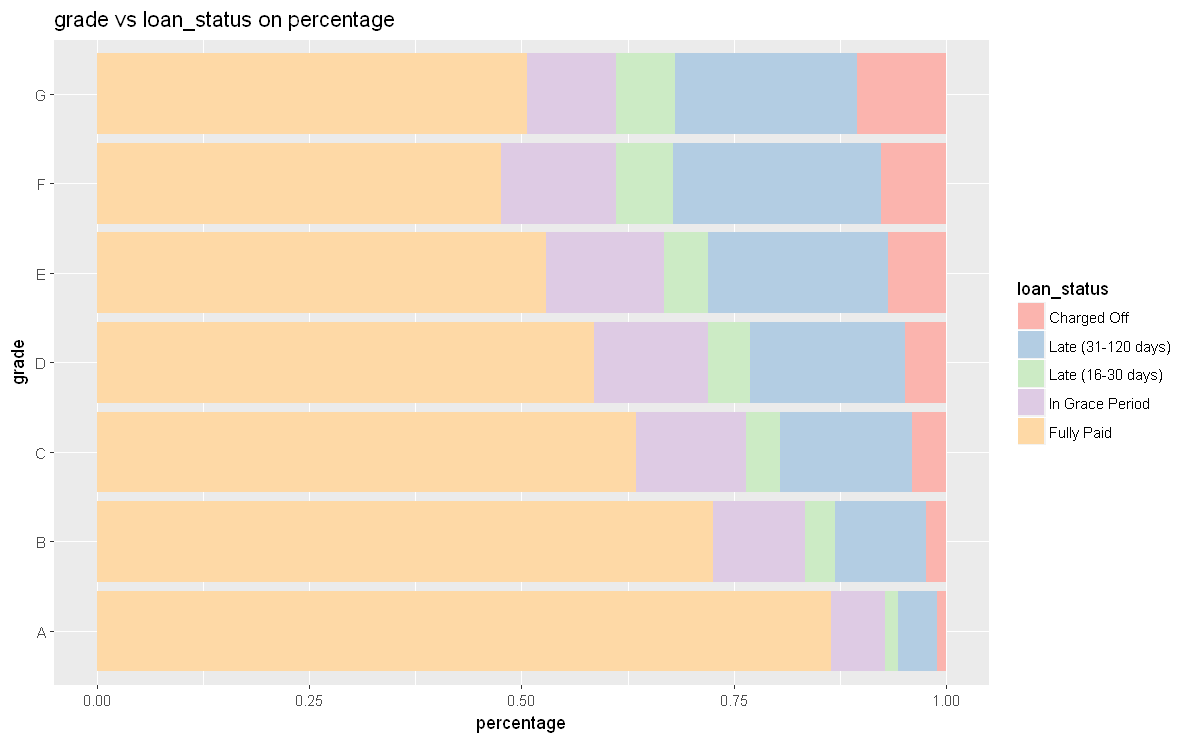

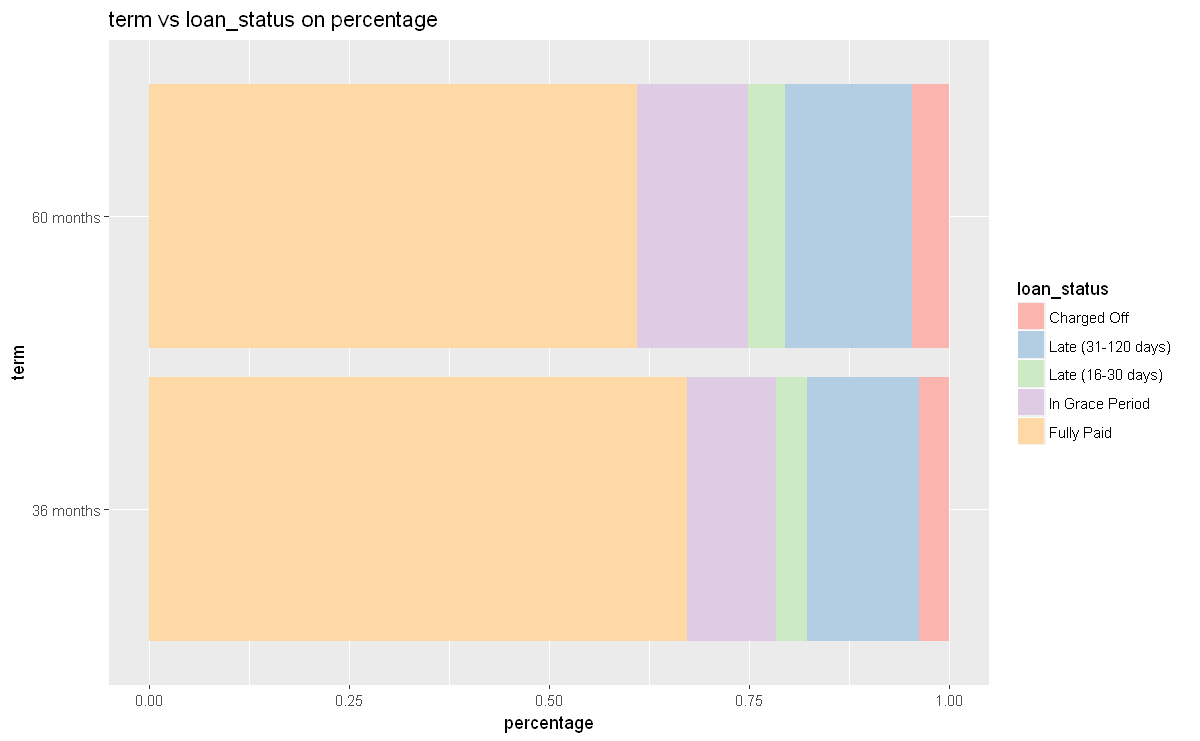

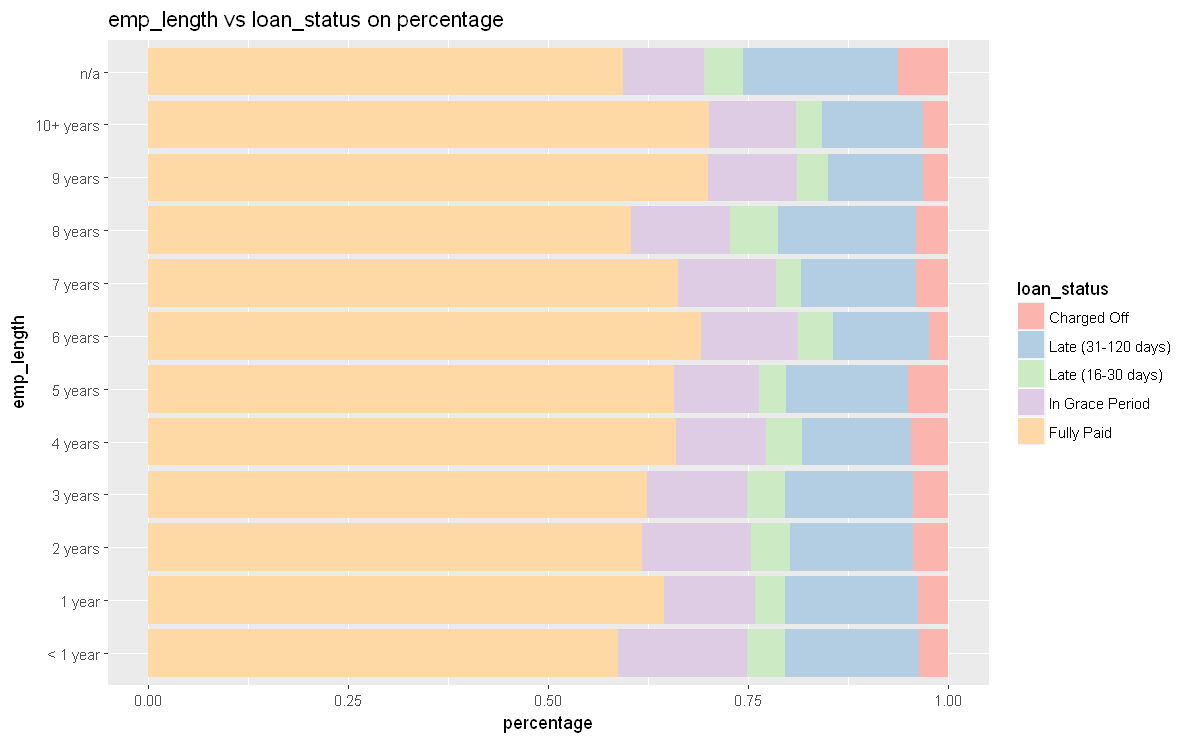

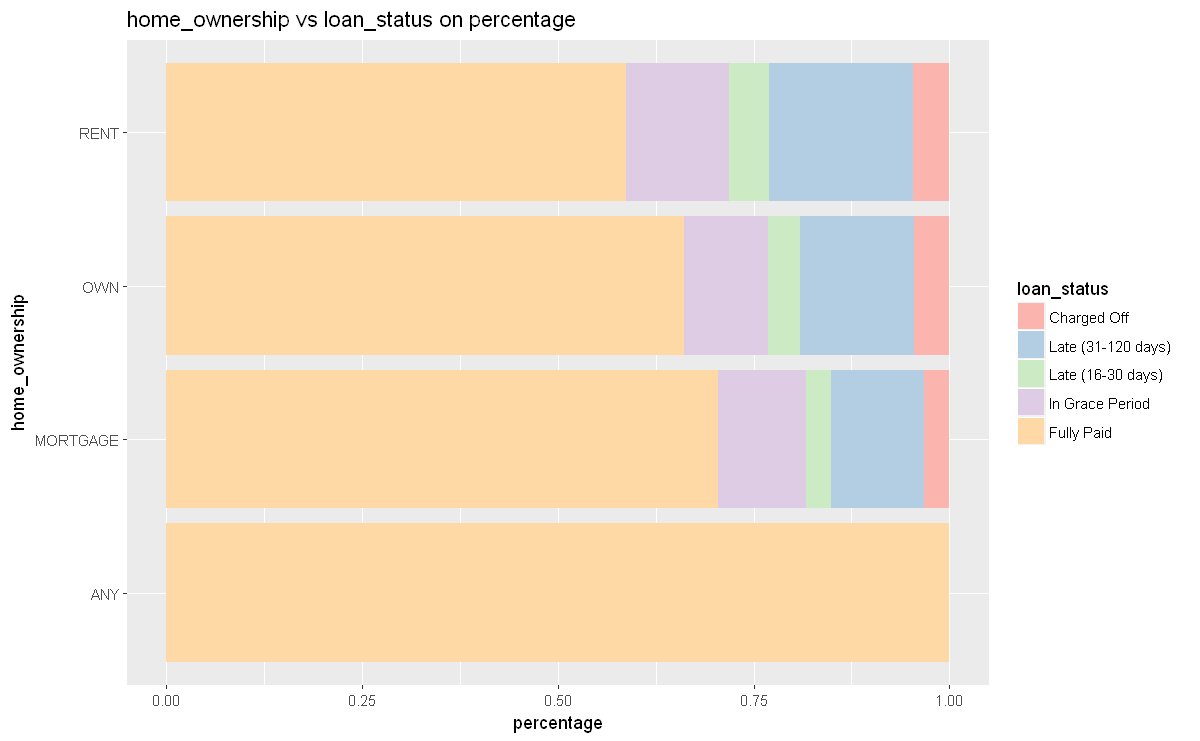

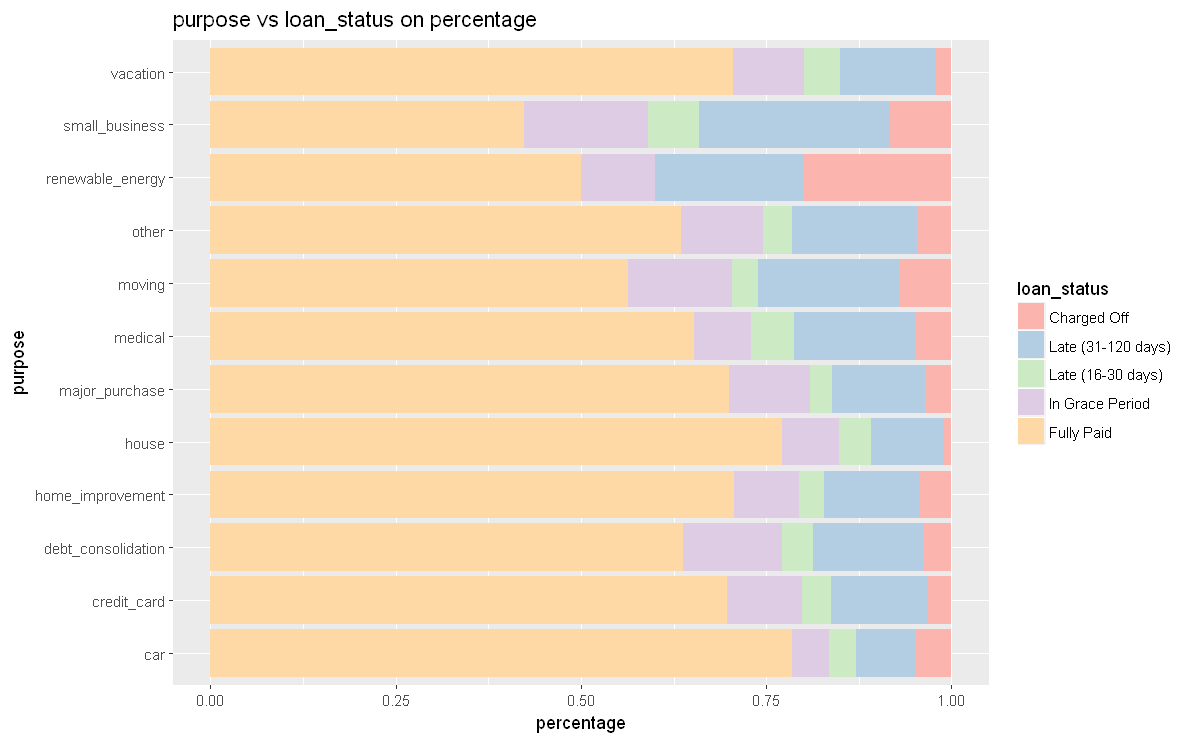

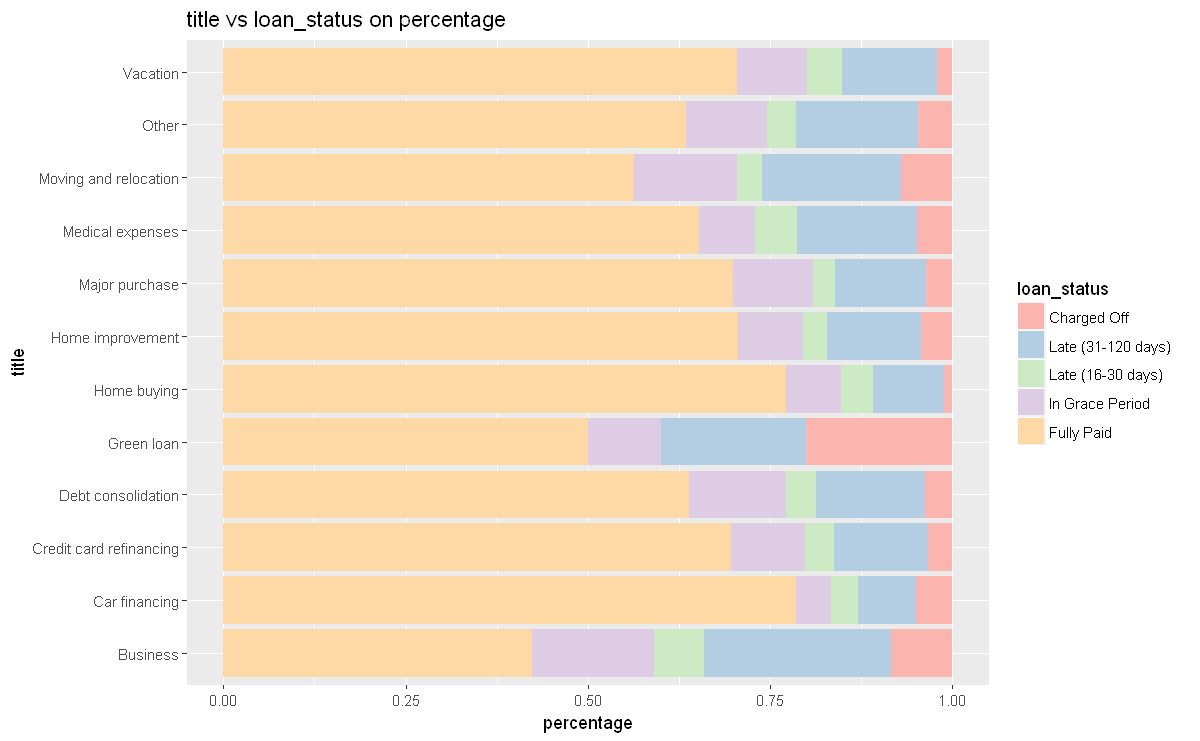

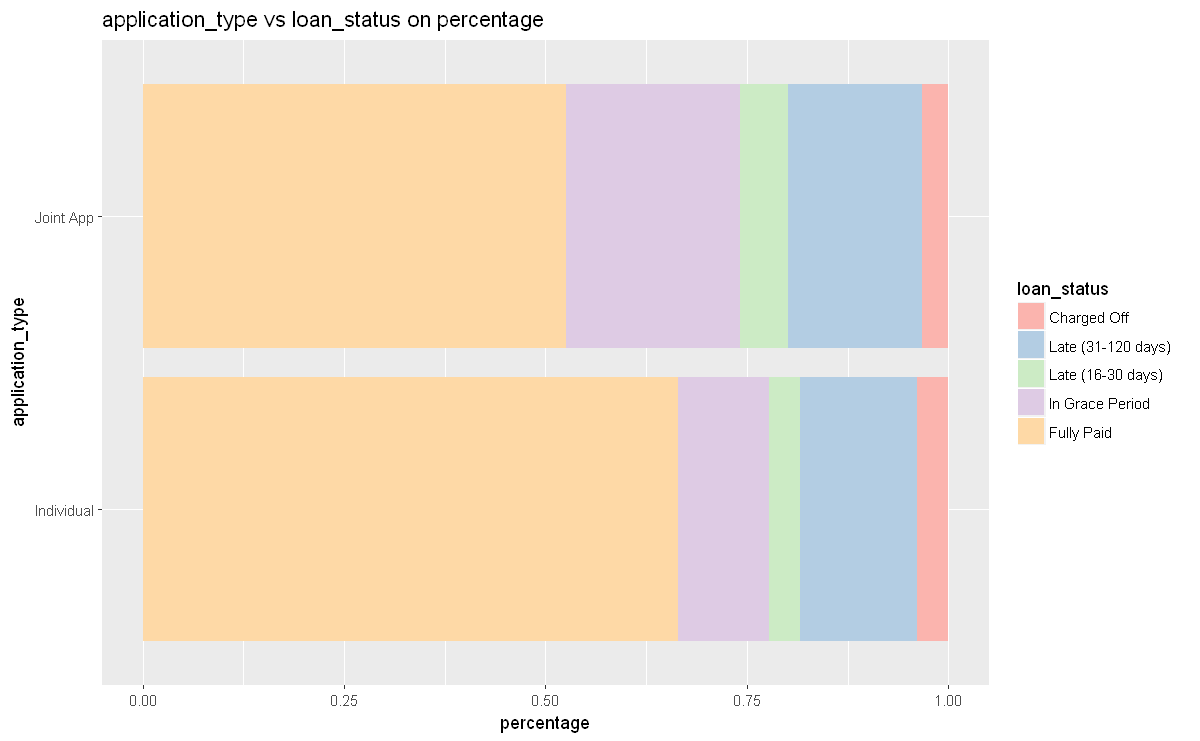

In [107]:
set_nc <- dataset %>%
    filter(loan_status != "Current")

factor1 <- c("grade","term","emp_length","home_ownership","purpose","title","application_type")
factor2 <- "loan_status"

for(one_factor in factor1){
    plot_group <- set_nc %>%
        group_by_(one_factor,factor2) %>%
        summarize(count = n()) %>%
        ungroup() %>%
        group_by_(one_factor) %>%
        mutate(percentage = count/sum(count)) %>%
        ungroup()
    plot_col_names <- colnames(plot_group)
    plot_group[[2]] <- fct_rev(plot_group[[2]])

    print(plot_group %>%
              ggplot(mapping = aes_string(x = plot_col_names[1], y = plot_col_names[4], fill = plot_col_names[2])) +
              geom_col() +
              labs(title = str_c(plot_col_names[1]," vs ",plot_col_names[2]," on ",plot_col_names[4])) +
              scale_fill_brewer(palette = "Pastel1",direction = 1) +
              coord_flip()) 
}
#heat maps for self created groups


### Insights from vertical percentage graphs:  
1. **grade vs loan_status:**  
percentage goes upper right corner

### Based on heat graph above, it seems like we should use horizontal comparison because it provides better insight, e.g:
1. **grade vs loan_status:**   
As the grade improves, fully paid ratio increases(color becomes lighter)

2. **term vs loan_status:**   
36 month is better, because it has more fully paid notes

3. **purpose vs loan_status:**   
don't invest in small business,renewable energy,moving and debt consolidation  
Do invest in vacation,house and car  
4. **title vs loan_status**  
Don't invest in moving and relocation, green loan and business  
Do invest in home buying and car financing  
5. **application type vs loan_status**  
Joint application is riskier
6. **home_owenership vs loan_status:**  
Mortgage better than own better than rent


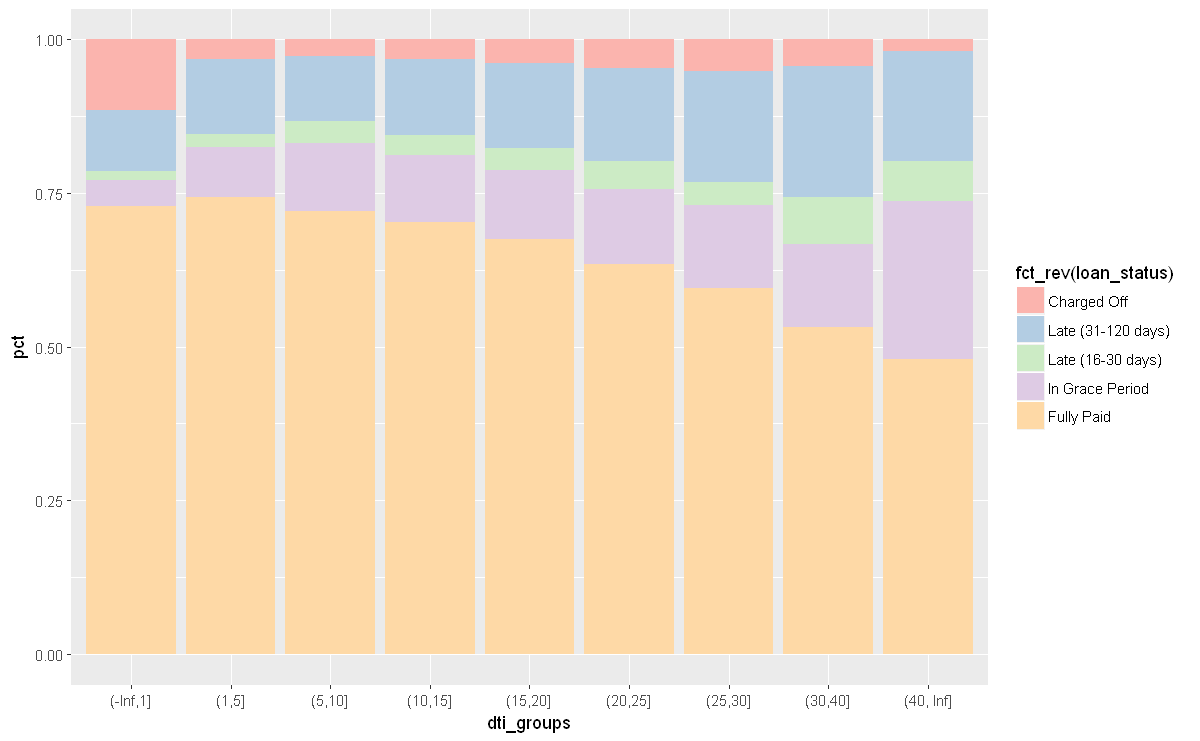

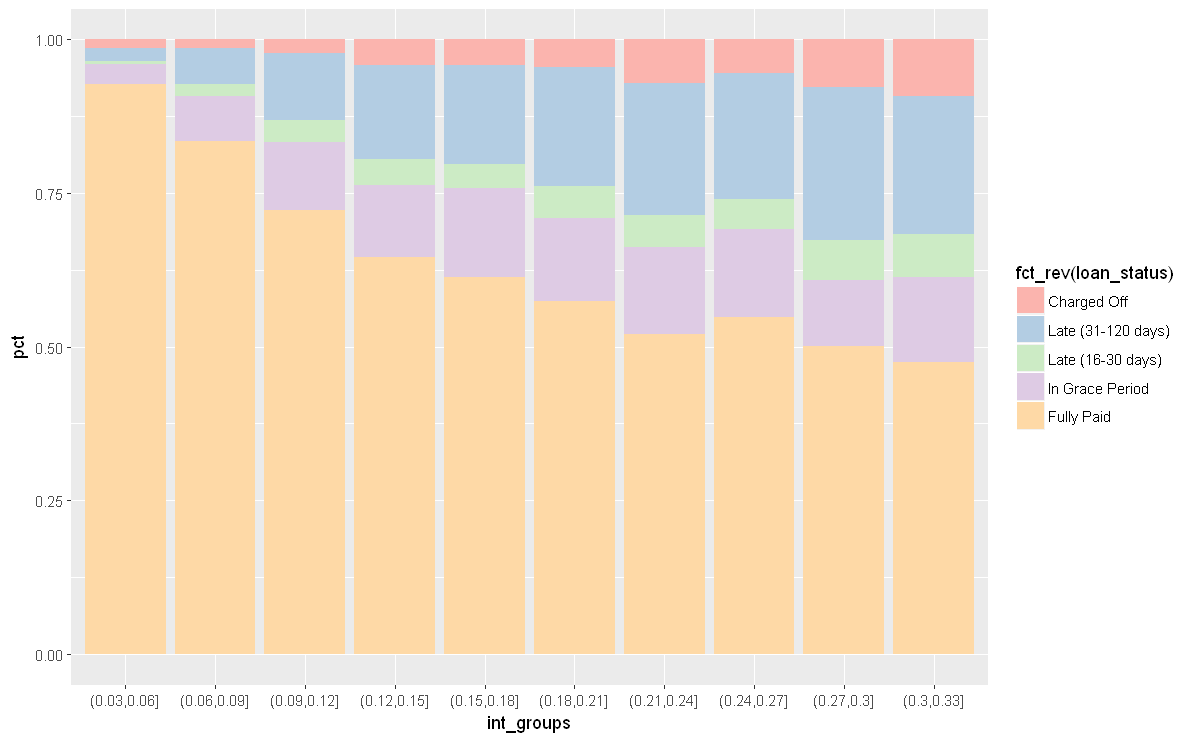

In [86]:
#loan status and numeric value combination
#dti
set_nc %>%
    mutate(dti_groups =cut(x = dti,breaks = c(-Inf,1,5,10,15,20,25,30,40,Inf))) %>% #wells fargo
    group_by(dti_groups,loan_status) %>%
    summarise(count = n()) %>%
    mutate(pct = count/sum(count)) %>%
    filter(!is.na(dti_groups)) %>%
    ungroup() %>%
    ggplot(mapping = aes(x = dti_groups, y = pct, fill = fct_rev(loan_status))) +
    geom_col(position = "stack") +
    scale_fill_brewer(palette = "Pastel1",direction = 1)
#we can observe that when dti is less than 1, actually there is lower pct of fully paid notes and higher ratio of Charged Off.
#I conclude that, for some of those who have dti less than 1, there may be some kind of fraud.

#interest rate and groups
set_nc %>%
    mutate(int_groups =cut(x = int_rate,breaks = seq(0,0.36,0.03))) %>% #wells fargo
    group_by(int_groups,loan_status) %>%
    summarise(count = n()) %>%
    mutate(pct = count/sum(count)) %>%
    filter(!is.na(int_groups)) %>%
    ungroup() %>%
    ggplot(mapping = aes(x = int_groups, y = pct, fill = fct_rev(loan_status))) +
    geom_col(position = "stack") +
    scale_fill_brewer(palette = "Pastel1",direction = 1)
#confirm that Higher interest, higher risk